## Checking if a pair of stocks is cointegrated

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

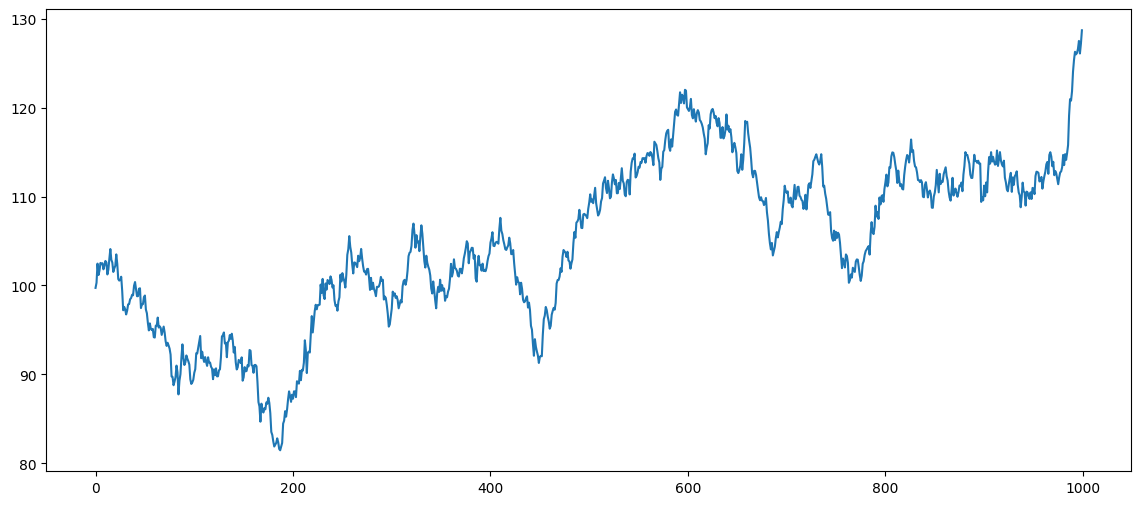

In [2]:
# just set the seed for the random number generator
np.random.seed(2018)
# use returns to create a price series
drift = 100
r1 = np.random.normal(0, 1, 1000) 
s1 = pd.Series(np.cumsum(r1), name='stock1') + drift
s1.plot(figsize=(14,6))
plt.show()

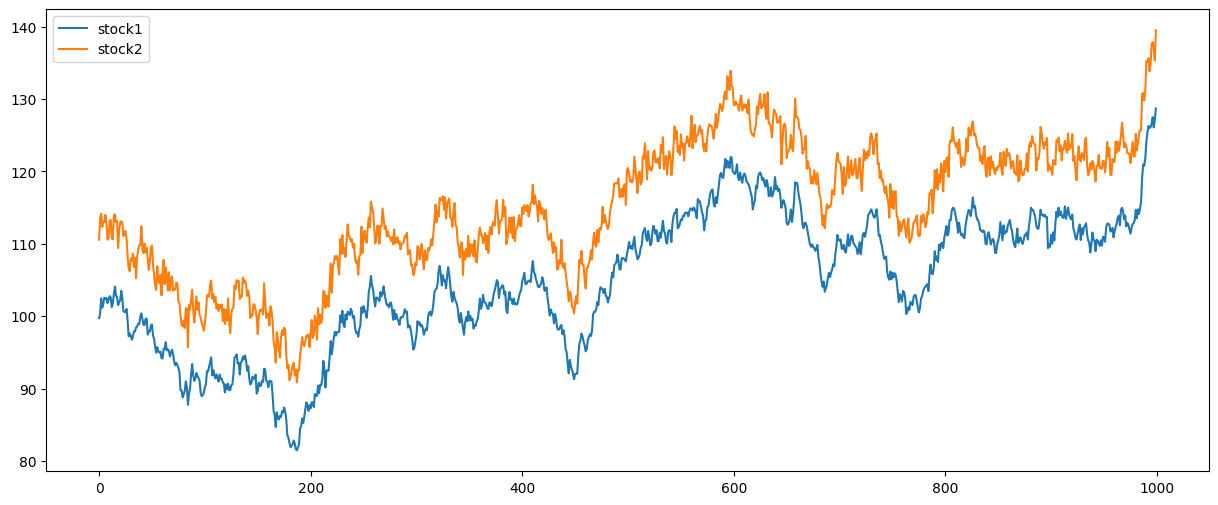

In [3]:
offset = 10
noise = np.random.normal(0, 1, 1000)
s2 = s1 + offset + noise
s2.name = 'stock2'
pd.concat([s1, s2], axis=1).plot(figsize=(15,6))
plt.show()

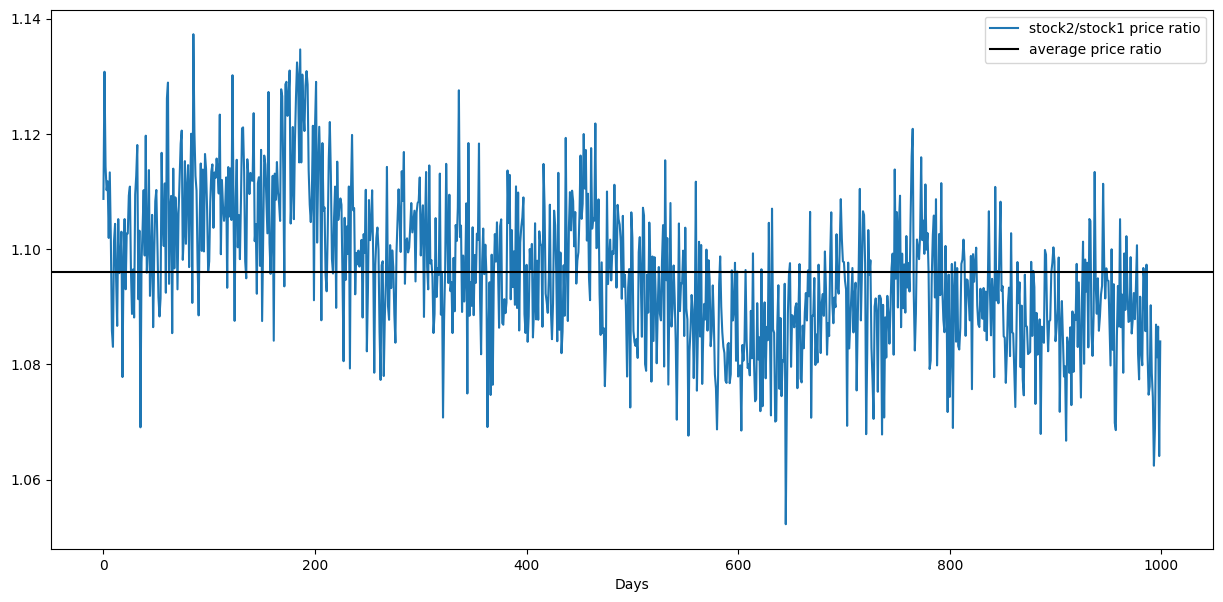

average price ratio 1.0960


In [4]:
price_ratio = s2/s1
price_ratio.plot(figsize=(15,7)) 
plt.axhline(price_ratio.mean(), color='black') 
plt.xlabel('Days')
plt.legend(['stock2/stock1 price ratio', 'average price ratio'])
plt.show()
print(f"average price ratio {price_ratio.mean():.4f}")

## Calculate hedge ratio with regression



In [5]:
s1.values.reshape(-1,1).shape

(1000, 1)

In [6]:
lr = LinearRegression()
lr.fit(s1.values.reshape(-1,1),s2.values.reshape(-1,1))

hedge_ratio = lr.coef_[0][0]
intercept = lr.intercept_[0]
print(f"Hedge ratio from regression is {hedge_ratio:.4f}, intercept is {intercept:.4f}")

Hedge ratio from regression is 1.0022, intercept is 9.7530


## Calculate the spread

Average spread is 9.753022747192906


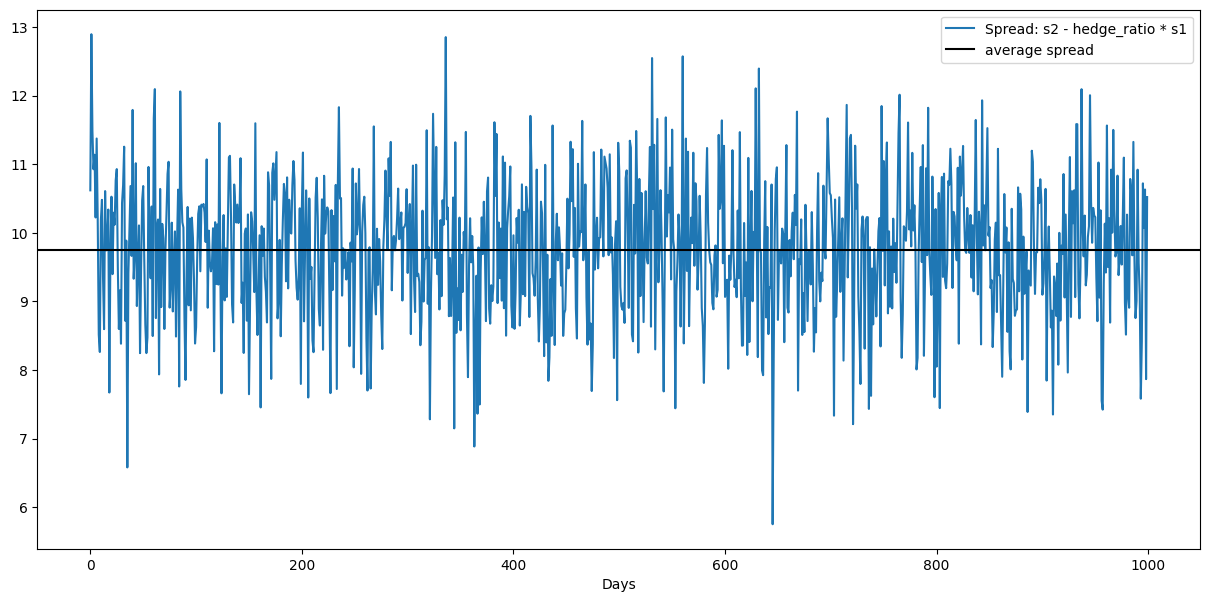

In [7]:
spread = s2 - s1 * hedge_ratio
print(f"Average spread is {spread.mean()}")

spread.plot(figsize=(15,7)) 
plt.axhline(spread.mean(), color='black') 
plt.xlabel('Days')
plt.legend(['Spread: s2 - hedge_ratio * s1', 'average spread'])
plt.show()

Include the intercept of the regression

Average spread with intercept included is 6.210143510543276e-15


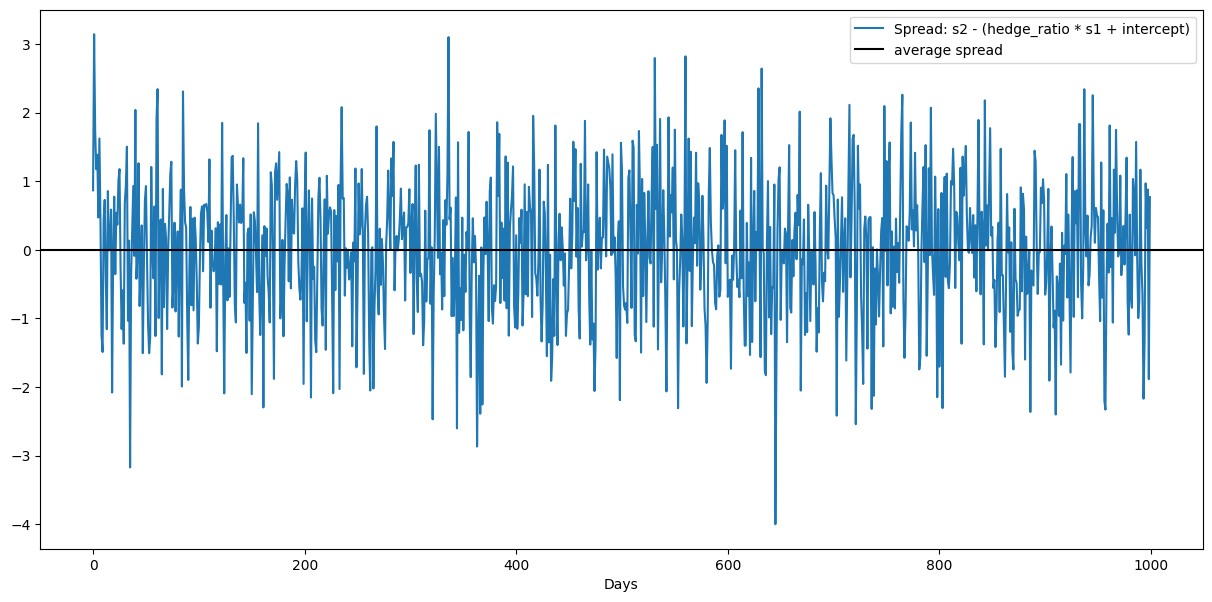

In [8]:
spread_with_intercept = s2 - (s1 * hedge_ratio + intercept)
print(f"Average spread with intercept included is {spread_with_intercept.mean()}")

spread_with_intercept.plot(figsize=(15,7)) 
plt.axhline(spread_with_intercept.mean(), color='black') 
plt.xlabel('Days')
plt.legend(['Spread: s2 - (hedge_ratio * s1 + intercept)', 'average spread'])
plt.show()

## Check if spread is stationary using Augmented Dickey Fuller Test

In [9]:
def is_spread_stationary(spread, p_level=0.05):
    """
    spread: obtained from linear combination of two series with a hedge ratio
    
    p_level: level of significance required to reject null hypothesis of non-stationarity
    
    returns:
        True if spread can be considered stationary
        False otherwise
    """
    #TODO: use the adfuller function to check the spread
    adf_result = adfuller(spread)
    
    #get the p-value
    pvalue = adf_result[1] 
    
    print(f"pvalue {pvalue:.4f}")
    if pvalue <= p_level:
        print(f"pvalue is <= {p_level}, assume spread is stationary")
        return True
    else:
        print(f"pvalue is > {p_level}, assume spread is not stationary")
        return False
    
# quiz_tests.test_is_spread_stationary(is_spread_stationary)

# Try out your function
print(f"Are the two series candidates for pairs trading? {is_spread_stationary(spread)}")

pvalue 0.0000
pvalue is <= 0.05, assume spread is stationary
Are the two series candidates for pairs trading? True
